# Basics > Correlation


<div class="alert alert-info">How correlated are the variables in the data?</div>


Create a correlation matrix of selected numeric variables (`int` or `float`). Correlations and p.values are provided for each variable pair. 

In [1]:
import polars as pl
import pyrsm as rsm

In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

Loading the "salary" dataset from pyrsm and adding it to the global environment.

In [3]:
salary = pl.read_parquet("https://github.com/radiant-ai-hub/raw/refs/heads/main/examples/data/basics/salary.parquet")
salary.head()

salary,rank,discipline,yrs_since_phd,yrs_service,sex
i32,enum,enum,i32,i32,enum
139750,"""Prof""","""B""",19,18,"""Male"""
173200,"""Prof""","""B""",20,16,"""Male"""
79750,"""AsstProf""","""B""",4,3,"""Male"""
115000,"""Prof""","""B""",45,39,"""Male"""
141500,"""Prof""","""B""",40,41,"""Male"""


In [4]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/refs/heads/main/examples/data/basics/salary_description.md")

## Salaries for Professors

### Description

The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members. A data frame with 397 observations on the following 6 variables.

### Variables

- rank = a factor with levels AsstProf, AssocProf, and Prof
- discipline = a factor with levels A ('theoretical' departments) or B ('applied' departments)
- yrs_since_phd = years since PhD
- yrs_service = years of service
- sex = a factor with levels Female and Male
- salary = nine-month salary, in dollars

### Source

Fox J. and Weisberg, S. (2011) An R Companion to Applied Regression, Second Edition Sage.


To create a correlation object use `rsm.basics.correlation`. The created object has attributes and methods that you can use to get the information you need. For example. the `.cr` attribute shows the correlation matrix as a two dimension numpy array.

In [5]:
cr = rsm.basics.correlation({"salary": salary})
cr.cr

array([[0.        , 0.41923111, 0.33474468],
       [0.41923111, 0.        , 0.90964915],
       [0.33474468, 0.90964915, 0.        ]])

In [6]:
cr = rsm.basics.correlation({"salary": salary[["salary", "yrs_since_phd", "yrs_service"]]})
cr.cr

array([[0.        , 0.41923111, 0.33474468],
       [0.41923111, 0.        , 0.90964915],
       [0.33474468, 0.90964915, 0.        ]])

Documentation about how to create a correlation object and how to acces its attrubutes is shown below.

Correlation objects have two methods: `summary` and `plot`. 

In [7]:
cr.summary()

Correlation
Data     : salary
Method   : pearson
Cutoff   : 0
Variables: salary, yrs_since_phd, yrs_service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.42   ┆               │
│ yrs_service   ┆ 0.33   ┆ 0.91          │
└───────────────┴────────┴───────────────┘

p.values:
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.0    ┆               │
│ yrs_service   ┆ 0.0    ┆ 0.0           │
└───────────────┴────────┴───────────────┘


We can use the `plot` method to get a visual representation of the correlation matrix. Note that scatter plots in the graph at most 1,000 data points by default. To generate scatter plots that use all observations use `plot(n = -1)`.

Stars shown in the plot are interpreted as:

- p.value between 0 and 0.001:  ***
- p.value between 0.001 and 0.01: **
- p.value between 0.01 and 0.05: *
- p.value between 0.05 and 0.1: .

In the graph below all observations all observations are use to calculate the correlations but only 50 randomly sampled observations are used to generate the scatter plots. The `salary` dataset has only 397 observations so this option isn't really needed. However, for datasets with many thousands of rows, scatter plots are very slow to generate. The default value for `nobs` is set to 1,000.

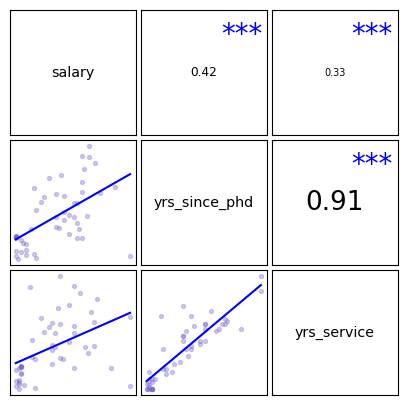

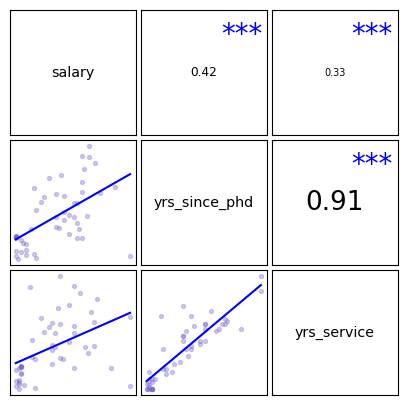

In [8]:
cr.plot(nobs=50)

In [9]:
cr.summary(cov=True)

Correlation
Data     : salary
Method   : pearson
Cutoff   : 0
Variables: salary, yrs_since_phd, yrs_service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.42   ┆               │
│ yrs_service   ┆ 0.33   ┆ 0.91          │
└───────────────┴────────┴───────────────┘

p.values:
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.0    ┆               │
│ yrs_service   ┆ 0.0    ┆ 0.0           │
└───────────────┴────────┴───────────────┘

Covariance matrix:
┌───────────────┬────────────┬───────────────┐
│               ┆ salary     ┆ yrs_since_phd │
╞═══════════════╪════════════╪═══════════════╡
│ yrs_since_phd ┆ 163,640.55 ┆               │
│ yrs_service   ┆ 131,869.3  ┆ 152.47       

When the number of observations in a dataset is more than 1,000 and you want to use all observations to calculate the correlations and generate the scatter plots use `nobs = -1`.

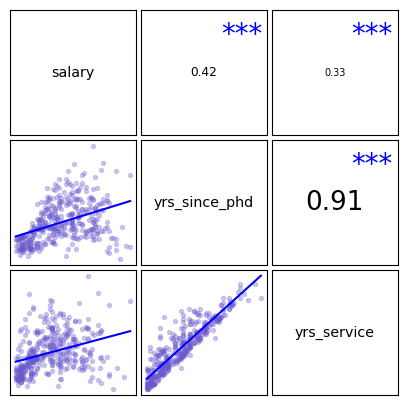

In [10]:
cr.plot(nobs=-1)

The font-size used in the plot is proportional to the size and significance of the correlation between two variables.

### Correlation cutoff

To show only correlations above a certain value choose a non-zero value in the numeric input between 0 and 1 (e.g., 0.15).

In [11]:
cr.summary(cutoff=0.5)

Correlation
Data     : salary
Method   : pearson
Cutoff   : 0.5
Variables: salary, yrs_since_phd, yrs_service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆        ┆               │
│ yrs_service   ┆        ┆ 0.91          │
└───────────────┴────────┴───────────────┘

p.values:
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆        ┆               │
│ yrs_service   ┆        ┆ 0.0           │
└───────────────┴────────┴───────────────┘


© Vincent Nijs (2026)